# **Spritle Software**

> **ML Developer - R&D Code Test**


1. Code quality carries weightage. Please keep appropriate comments wherever needed
and use suitable variable names and method names.
2.   Duration of the test: 16 hours
[Task Link](https://drive.google.com/file/d/1ezsHlNrOU5GdHEiszzQSzJBB8cNxJ0d8/view)



In [ ]:
import tensorflow as tf

# **Question 1**
Create two custom layers in TensorFlow that add two inputs and multiply two inputs
respectively [or any other mathematical operations of your choice(linear or
nonlinear)] Add layer names and other things that are present in other common
layers in TensorFlow.**5 points**

In [ ]:

class AddLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AddLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # No trainable parameters for this layer, to build
        pass

    def call(self, inputs):
        # To ensure that the input has two tensors
        assert len(inputs) == 2, "AddLayer expects two inputs"
        # Perform element-wise addition
        result = inputs[0] + inputs[1]
        return result

class MultiplyLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(MultiplyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # No trainable parameters for this layer, to build
        pass

    def call(self, inputs):
        # To ensure that the input has two tensors
        assert len(inputs) == 2, "MultiplyLayer expects two inputs"
        # Perform element-wise multiplication
        result = inputs[0] * inputs[1]
        return result


# Creating instances of the custom layers
add_layer = AddLayer(name='custom_add_layer')
multiply_layer = MultiplyLayer(name='custom_multiply_layer')

# Defining input tensors
input1 = tf.keras.layers.Input(shape=(10,), name='input1')
input2 = tf.keras.layers.Input(shape=(10,), name='input2')

# Applying custom layers to inputs
added_result = add_layer([input1, input2])
multiplied_result = multiply_layer([input1, input2])

# Creating models for visualization
add_model = tf.keras.models.Model(inputs=[input1, input2], outputs=added_result, name='add_model')
multiply_model = tf.keras.models.Model(inputs=[input1, input2], outputs=multiplied_result, name='multiply_model')

# Display model summaries
add_model.summary()
multiply_model.summary()


Model: "add_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input1 (InputLayer)         [(None, 10)]                 0         []                            
                                                                                                  
 input2 (InputLayer)         [(None, 10)]                 0         []                            
                                                                                                  
 custom_add_layer (AddLayer  (None, 10)                   0         ['input1[0][0]',              
 )                                                                   'input2[0][0]']              
                                                                                                  
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 

**Explanation of Code:**
1.   The __init__ method initializes the layer within layers.Layer.
2.   The build method is empty as there are no trainable parameters to construct.
3.   In the call method, the layer receives two input tensors and performs addition or multiplication.
4.  Custom layer instances (add_layer and multiply_layer) are created with specified names.
5.  Input tensors (input1 and input2) are defined with a shape of (10,), and models (add_model and multiply_model) are created for  visualization or analysis, with model summaries displayed.


# **Question 2**
Combine these two layers in a third custom layer. Concatenate them or multiply
them etc. (5pts)

In [ ]:
class CombinedLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(CombinedLayer, self).__init__(**kwargs)
        self.add_layer = AddLayer()
        self.multiply_layer = MultiplyLayer()

    def call(self, inputs):
        # To ensure that the input has two tensors
        assert len(inputs) == 2, "CombinedLayer expects two inputs"

        # Applying the custom layers
        added_result = self.add_layer(inputs)
        multiplied_result = self.multiply_layer(inputs)

        # Concatenate the results along the last axis
        combined_result = tf.concat([added_result, multiplied_result], axis=-1)

        return combined_result



# Create an instance of the combined layer
combined_layer = CombinedLayer(name='custom_combined_layer')

# Define input tensors
input1 = tf.keras.layers.Input(shape=(10,), name='input1')
input2 = tf.keras.layers.Input(shape=(10,), name='input2')

# Apply the combined layer to inputs
combined_result = combined_layer([input1, input2])

# Create a model for visualization (optional)
combined_model = tf.keras.models.Model(inputs=[input1, input2], outputs=combined_result, name='combined_model')

# Display the model summary (optional)
combined_model.summary()


Model: "combined_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input1 (InputLayer)         [(None, 10)]                 0         []                            
                                                                                                  
 input2 (InputLayer)         [(None, 10)]                 0         []                            
                                                                                                  
 custom_combined_layer (Com  (None, 20)                   0         ['input1[0][0]',              
 binedLayer)                                                         'input2[0][0]']              
                                                                                                  
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (

**Explanation Of Code**
1. The `CombinedLayer` class is defined as a custom layer in TensorFlow, incorporating the previously created custom layers (`AddLayer` and `MultiplyLayer`).
2. In the `__init__` method, instances of `AddLayer` and `MultiplyLayer` are created as attributes of the `CombinedLayer`.
3. The `call` method ensures that the layer receives two input tensors and applies both custom layers to generate added and multiplied results.
4. The results are concatenated along the last axis to create a combined result.
5. An instance of the `CombinedLayer` is created, applied to input tensors, and a model (`combined_model`) is generated for visualization, with a summary.

# **Question 3**
Create a model using these and observe how batch inference works **10 points**

In [ ]:

# Custom Layers
class AddLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AddLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        pass

    def call(self, inputs):
        assert len(inputs) == 2, "AddLayer expects two inputs"
        result = inputs[0] + inputs[1]
        return result

class MultiplyLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(MultiplyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        pass

    def call(self, inputs):
        assert len(inputs) == 2, "MultiplyLayer expects two inputs"
        result = inputs[0] * inputs[1]
        return result

class CombinedLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(CombinedLayer, self).__init__(**kwargs)
        self.add_layer = AddLayer()
        self.multiply_layer = MultiplyLayer()

    def call(self, inputs):
        assert len(inputs) == 2, "CombinedLayer expects two inputs"
        added_result = self.add_layer(inputs)
        multiplied_result = self.multiply_layer(inputs)
        combined_result = tf.concat([added_result, multiplied_result], axis=-1)
        return combined_result

# Model
class CustomModel(tf.keras.models.Model):
    def __init__(self, **kwargs):
        super(CustomModel, self).__init__(**kwargs)
        self.combined_layer = CombinedLayer()
        self.dense_layer = tf.keras.layers.Dense(units=1, activation='sigmoid', name='output_layer')

    def call(self, inputs):
        combined_result = self.combined_layer(inputs)
        output = self.dense_layer(combined_result)
        return output

# Example usage:

# Create an instance of the custom model
custom_model = CustomModel(name='custom_model')

# Generate synthetic data for batch inference
import numpy as np
batch_size = 20
input_data1 = np.random.rand(batch_size, 10)
input_data2 = np.random.rand(batch_size, 10)

# Perform batch inference
predictions = custom_model.predict([input_data1, input_data2])

# Display the predictions
print("Batch Inference Predictions:")
print(predictions)


1/1 [==============================] - 0s 80ms/step
Batch Inference Predictions:
[[0.7564142 ]
 [0.44911674]
 [0.68947554]
 [0.5110209 ]
 [0.61708564]
 [0.31909764]
 [0.6092247 ]
 [0.3173235 ]
 [0.5466854 ]
 [0.43044743]
 [0.4945489 ]
 [0.5137492 ]
 [0.55944437]
 [0.6013659 ]
 [0.4680307 ]
 [0.4888425 ]
 [0.6182135 ]
 [0.49518752]
 [0.4817205 ]
 [0.52867687]]


**Explanation Of Code**

1. **Custom Layers:** It has two custom layers (`AddLayer` and `MultiplyLayer`) that perform addition and multiplication operations, respectively.

2. **CombinedLayer:** A custom layer (`CombinedLayer`) is created, utilizing the previous layers to perform both addition and multiplication on two inputs and concatenate the results.

3. **Custom Model:** A model (`CustomModel`) is constructed by combining the `CombinedLayer` with a dense output layer that uses a sigmoid activation.

4. **Batch Inference Setup:** Data is generated for batch inference, simulating 20 samples with 10 features each.

5. **Batch Inference:** The custom model is used for batch inference, predicting the output for the entire batch



# Question 4
Use a predefined layer in Tensorflow to split an input/image into 4x4 = 16 tiles
**(5pts)**

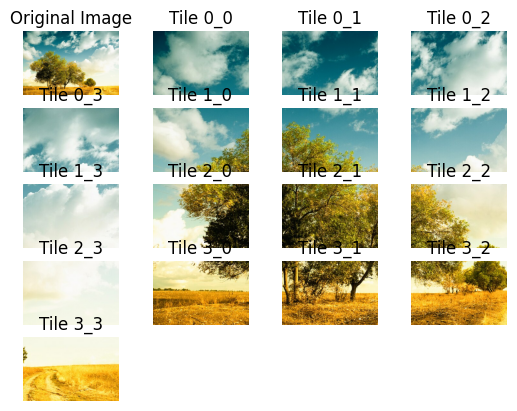

In [ ]:
import numpy as np

# Load the image
image_path = '/content/Autumn_scenery.jpg'
image = tf.io.read_file(image_path)
image = tf.image.decode_image(image, channels=3)  # Assuming RGB image

# Convert to NumPy array
image_np = image.numpy()

# Split the image into 4x4 tiles using NumPy
rows, cols = 4, 4
height, width, channels = image_np.shape
tile_height, tile_width = height // rows, width // cols

tiles = [image_np[i * tile_height: (i + 1) * tile_height, j * tile_width: (j + 1) * tile_width, :]
         for i in range(rows) for j in range(cols)]

# Display the original image
plt.subplot(5, 4, 1)
plt.imshow(image_np)
plt.title('Original Image')
plt.axis('off')

# Display the 16 tiles
for i in range(rows):
    for j in range(cols):
        plt.subplot(5, 4, i * cols + j + 2)
        plt.imshow(tiles[i * rows + j])
        plt.title(f'Tile {i}_{j}')
        plt.axis('off')

plt.show()


**Explanation Of Code**
- **Load Image:** Reads an image file (`Autumn_scenery.jpg`) using TensorFlow's I/O functions.

- **Decode Image:** The image is decoded using TensorFlow's `decode_image` function, assuming it is in RGB format.

- **Convert to NumPy:** The decoded image is converted to a NumPy array (`image_np`).

- **Split into Tiles:** The image is divided into a 4x4 grid of tiles using NumPy array slicing based on the specified number of rows and columns (`rows` and `cols`).

- **Display Original Image:** The original image is displayed as the first subplot in a 5x4 grid using Matplotlib.

- **Display Tiles:** Each of the 16 tiles is displayed in the subsequent subplots, labeled with titles indicating their position in the grid (`Tile i_j`).

- **Show Plot:** The Matplotlib `plt.show()` function is called to display the original image and its 16 tiles in a visual grid.

# **Question 5**
Write a graph data structure in python with random connections between nodes.
**(5pts)**

In [ ]:
class Graph:
    def __init__(self):
        self.graph = {}

    def add_edge(self, node1, node2):
        if node1 not in self.graph:
            self.graph[node1] = []
        self.graph[node1].append(node2)

    def display_graph(self):
        for node in self.graph:
            print(f"{node} -> {', '.join(self.graph[node])}")

# Create a graph with 5 nodes and 7 edges
graph = Graph()
graph.add_edge('A', 'B')
graph.add_edge('A', 'C')
graph.add_edge('A', 'D')
graph.add_edge('B', 'E')
graph.add_edge('C', 'E')
graph.add_edge('D', 'E')
graph.add_edge('E', 'A')

# Display the graph
graph.display_graph()


A -> B, C, D
B -> E
C -> E
D -> E
E -> A


In [ ]:
pip install networkx matplotlib


# **Graphical Representation of Graph**

- **Graph Nodes (Vertices):** The graph consists of five nodes labeled 'A' through 'E'.

- **Graph Edges:** The edges in the directed graph represent the relationships or connections between nodes. The defined edges are:
  1. A -> B
  2. A -> C
  3. A -> D
  4. B -> E
  5. C -> E
  6. D -> E
  7. E -> A

- **Number of Edges:** There are a total of 7 directed edges in the graph

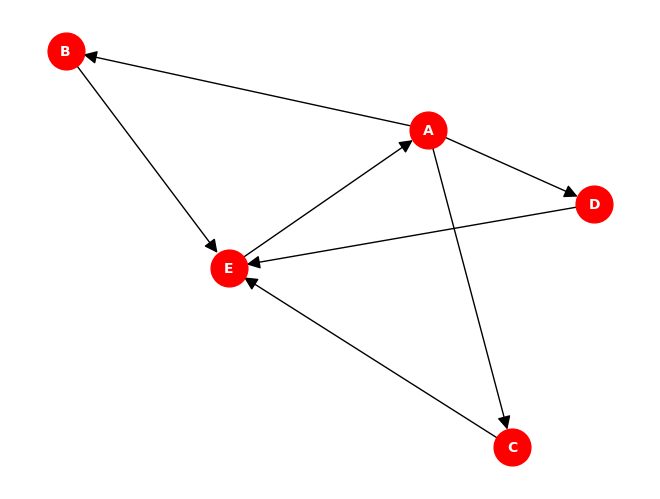

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
edges = [('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'E'), ('C', 'E'), ('D', 'E'), ('E', 'A')]
G.add_edges_from(edges)

# Plot the graph
pos = nx.spring_layout(G)  # Layout for the nodes
nx.draw(G, pos, with_labels=True, node_size=700, node_color="red", font_size=10, font_color="white", font_weight="bold", arrowsize=20)

# Display the plot
plt.show()


# **Question 6**
Two-part question:
1.  Do inference in one of the nodes and write any rules (>,<,==) to decide the
next node based on the output (5 pts).
2.   You can choose to use the custom model you have created in questions 1 or
2 inside the node. The input can be a random input created using
random.randint(1,100). You can use any error correction techniques
we used before. (5pts)


Output at A: -0.6284584403038025
Next Node: Node_A_Lesser


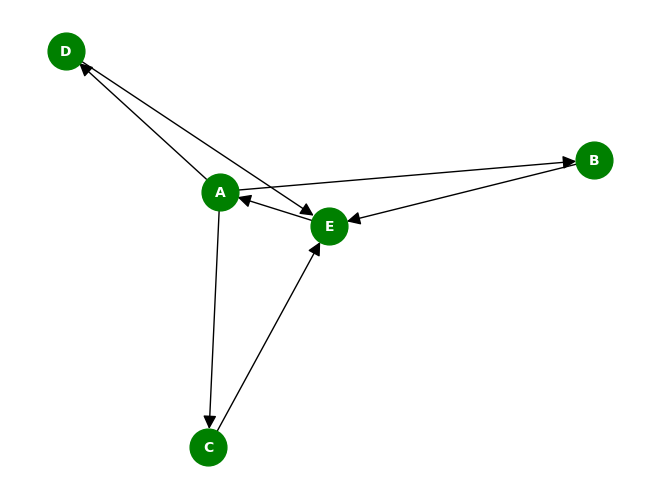

In [ ]:
import tensorflow as tf
import random
import networkx as nx
import matplotlib.pyplot as plt

# Custom layer for inference
class InferenceLayer(tf.keras.layers.Layer):
    def __init__(self, threshold, **kwargs):
        super(InferenceLayer, self).__init__(**kwargs)
        self.dense_layer = tf.keras.layers.Dense(1, activation='linear')
        self.threshold = threshold

    def call(self, inputs):
        return self.dense_layer(inputs)

# Create a directed graph
G = nx.DiGraph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'E'), ('C', 'E'), ('D', 'E'), ('E', 'A')])

# Set up inference node and threshold
inference_node = 'A'
inference_threshold = 50.0

# Perform inference at the specified node
if inference_node in G.nodes:
    input_data = tf.constant([[random.uniform(1, 100)]])
    inference_model = InferenceLayer(threshold=inference_threshold)
    output = inference_model(input_data)

    # Decision rules
    if output > inference_threshold:
        next_node = "Node_A_Greater"
    elif output < inference_threshold:
        next_node = "Node_A_Lesser"
    else:
        next_node = "Node_A_Equal"

    print(f"Output at {inference_node}: {output.numpy()[0, 0]}")
    print(f"Next Node: {next_node}")
else:
    print(f"The specified inference node {inference_node} is not in the graph.")

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="green", font_size=10, font_color="white", font_weight="bold", arrowsize=20)
plt.show()


Explanation Of Code
1.  The node 'A' is chosen for inference, and a threshold of 50.0 is set
2.  A random input data point within the range of 1 to 100 is created.
3.  Decision rules are applied based on the output of the inference layer.
If the output is greater than the threshold, the next node is set to "Node_A_Greater".
If the output is less than the threshold, the next node is set to "Node_A_Lesser".
If the output is equal to the threshold, the next node is set to "Node_A_Equal".




Output at A: 6107.248046875
Next Node: Node_A_Greater


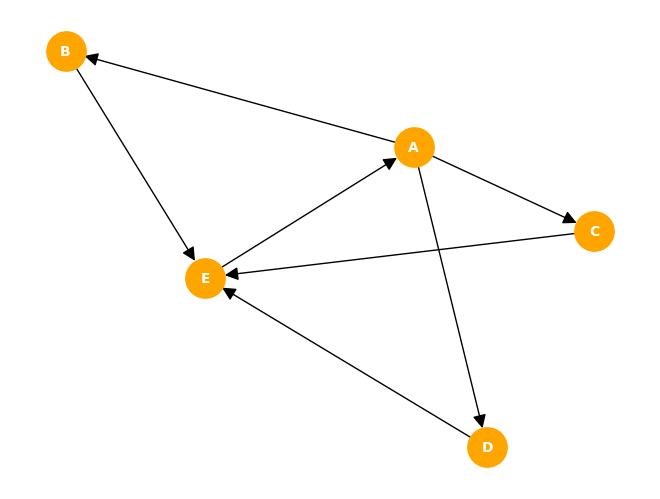

In [ ]:
import tensorflow as tf
import random
import networkx as nx
import matplotlib.pyplot as plt

# Custom model using simple layers
class CustomModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super(CustomModel, self).__init__(**kwargs)

    def call(self, inputs):
        x = tf.math.add(inputs[0], inputs[1])
        x = tf.math.multiply(x, inputs[0])
        return x

# Create a directed graph
G = nx.DiGraph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'E'), ('C', 'E'), ('D', 'E'), ('E', 'A')])

# Set up inference node
inference_node = 'A'

# Perform inference at the specified node
if inference_node in G.nodes:
    # Generate random input
    input_a = tf.constant([random.uniform(1, 100)], dtype=tf.float32)
    input_b = tf.constant([random.uniform(1, 100)], dtype=tf.float32)

    # Create and compile the custom model
    custom_model = CustomModel()
    custom_model.compile(optimizer='adam', loss='mse')

    # Perform inference
    output = custom_model([input_a, input_b])

    # Decision rules (using a simple threshold)
    threshold = 50.0
    if output.numpy()[0] > threshold:
        next_node = "Node_A_Greater"
    elif output.numpy()[0] < threshold:
        next_node = "Node_A_Lesser"
    else:
        next_node = "Node_A_Equal"

    print(f"Output at {inference_node}: {output.numpy()[0]}")
    print(f"Next Node: {next_node}")
else:
    print(f"The specified inference node {inference_node} is not in the graph.")

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=800, node_color="orange", font_size=10, font_color="white", font_weight="bold", arrowsize=20)
plt.show()
